Lets load our dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from utils.regression import least_squares
from utils.correlation import pearson_corr_coef
from utils.mse import mse
from utils.gradient_descent import gradient_descent
from utils.datasets import LinearRegressionDataset, PolynomialRegressionDataset, MultipleRegressionDataset 


Optimize our linear model using Least Squares

In [ ]:
gen = LinearRegressionDataset()

dataset = gen.generate()


X = dataset['X']['train']
Y = dataset['Y']['train']

slope, intercept = least_squares(X, Y)
X = dataset['X']['test']
Y = dataset['Y']['test']

predict_y = X * slope + intercept

coefficient = pearson_corr_coef(Y, predict_y)
error = mse(Y, predict_y)


Create a scatter plot of our data as well as our linear model

Text(0.5, 1.0, 'Regression line using Least Squares: y=10.07+4.95x, r=0.99, mse=0.83')

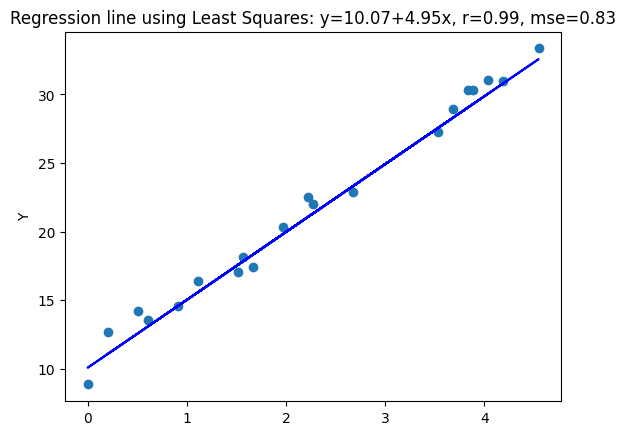

In [ ]:

line = f'Regression line using Least Squares: y={intercept:.2f}+{slope:.2f}x, r={coefficient:.2f}, mse={error:.2f}'
plt.scatter(X, Y)
plt.plot(X, predict_y, 'b')
plt.ylabel('Y')
plt.title(line)

Optimize our Linear Model using gradient descent

In [ ]:

predict_slope, predict_intercept, costs = gradient_descent(X, Y)


X = dataset['X']['test']
Y = dataset['Y']['test']
predict_y = X * predict_slope + predict_intercept

Text(0.5, 1.0, 'Regression line using Gradient Descent: y=10.30+5.04x, r=0.99, mse=0.62')

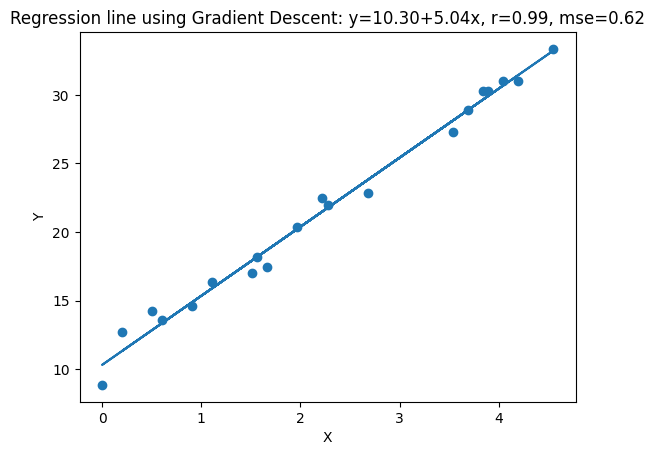

In [ ]:

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X, predict_y)
coefficient = pearson_corr_coef(Y, predict_y)
line = f'Regression line using Gradient Descent: y={predict_intercept:.2f}+{predict_slope:.2f}x, r={coefficient:.2f}, mse={costs[-1]:.2f}'
plt.title(line)


Lets perform a polynomial transform on a dataset and use a linear model once again

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:

degree = 3

gen = PolynomialRegressionDataset('data/polydata-1.csv', 'x', 'y')
dataset = gen.generate()

X = dataset['X']['train']
Y = dataset['Y']['train']

poly_reg_model = LinearRegression()


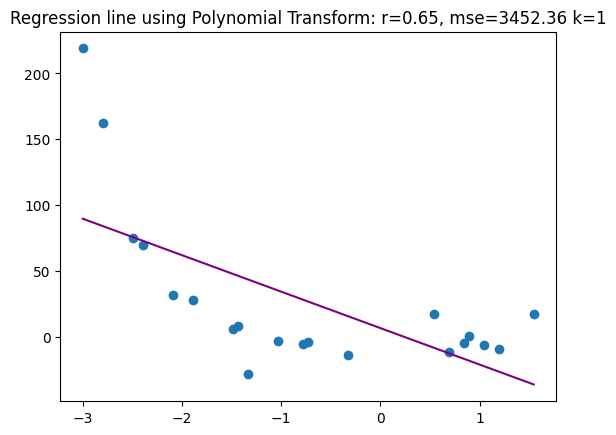

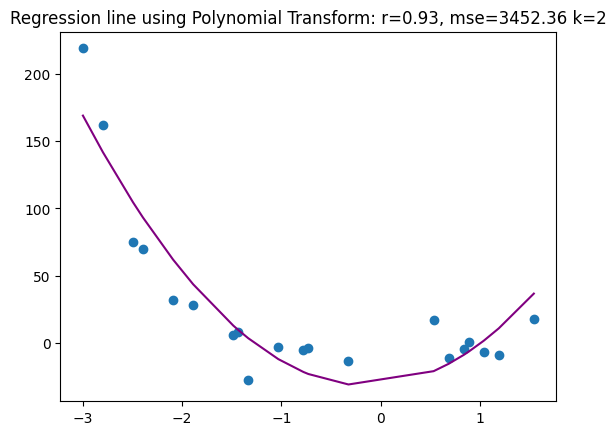

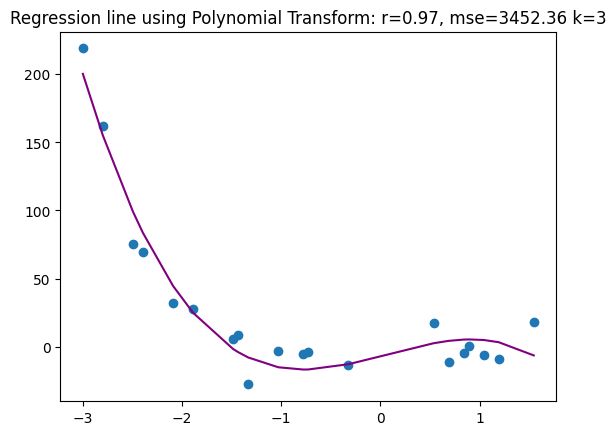

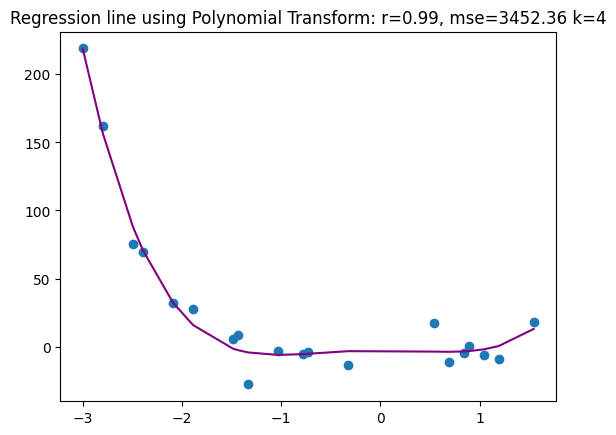

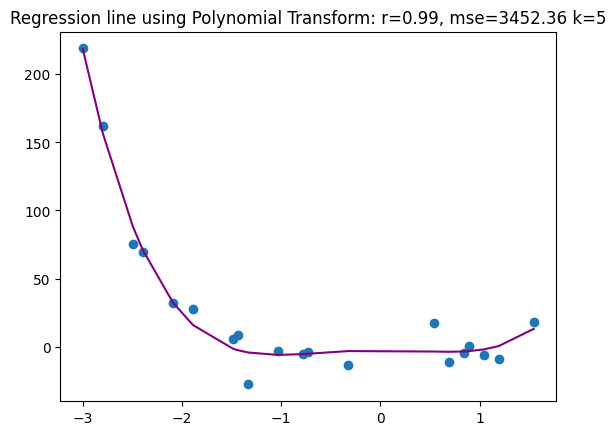

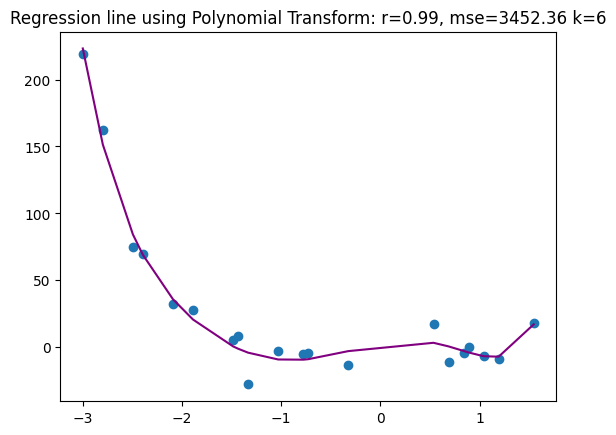

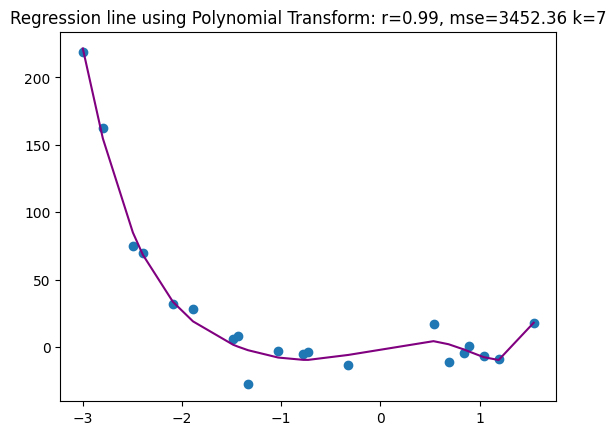

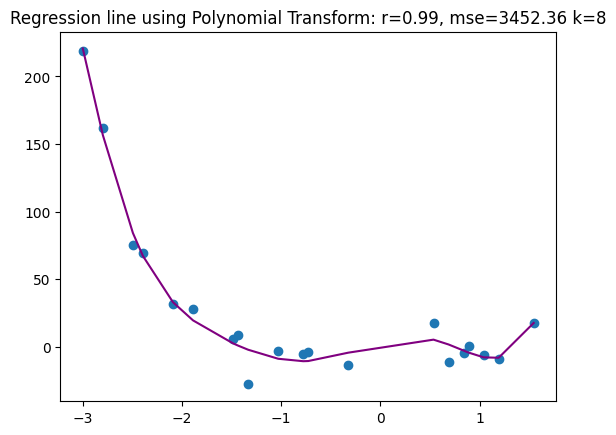

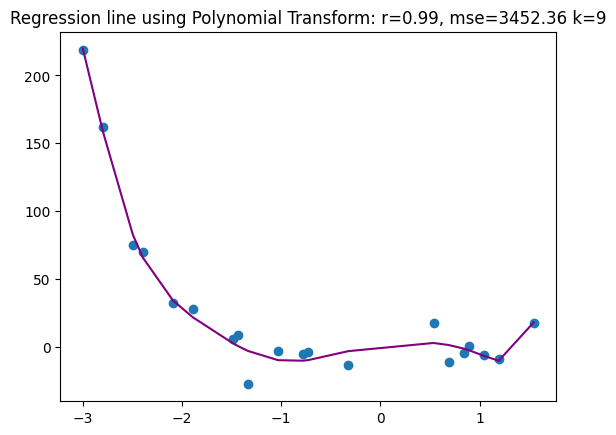

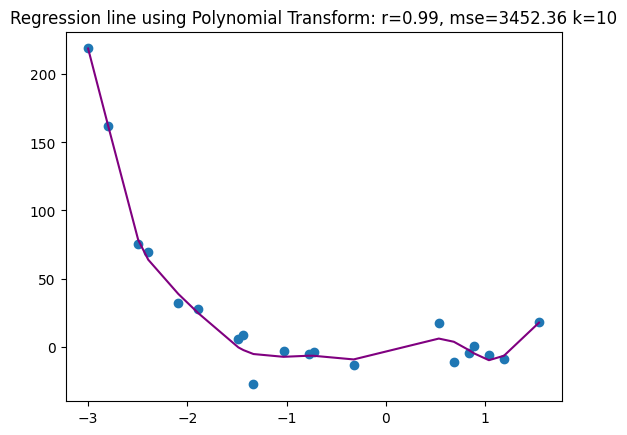

In [ ]:

X = dataset['X']['test']
Y = dataset['Y']['test']

idx = np.argsort(X)
X = X[idx]
Y = Y[idx]


for k in range(1, 11):
    degree = k
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X.reshape(-1, 1))

    poly_reg_model.fit(poly_features, Y)

    poly_features = poly.fit_transform(X.reshape(-1, 1))

    y_predicted = poly_reg_model.predict(poly_features)
    coefficient = pearson_corr_coef(Y, y_predicted)
    error = mse(Y, predict_y)


    line = f'Regression line using Polynomial Transform: r={coefficient:.2f}, mse={error:.2f} k={degree}'
    plt.title(line)


    
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='purple')
    plt.show()


Lets work with a dataset of multiple regression 

In [14]:

data_gen = MultipleRegressionDataset()
dataset = data_gen.generate()

X_train = dataset['X']['train']
y_train = dataset['Y']['train']
X_test = dataset['X']['test']
y_test = dataset['Y']['test']

feature_names = dataset['X']['feature_names']
target_name = dataset['Y']['feature_names'][0]

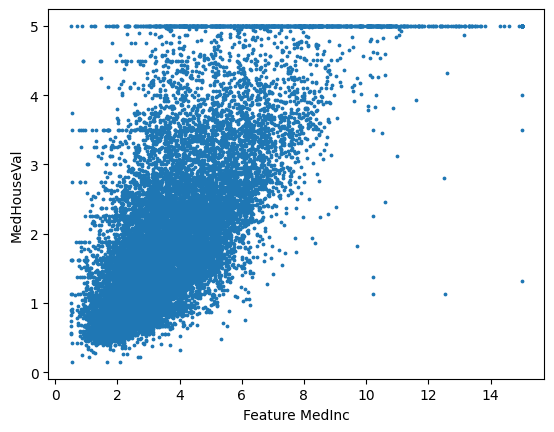

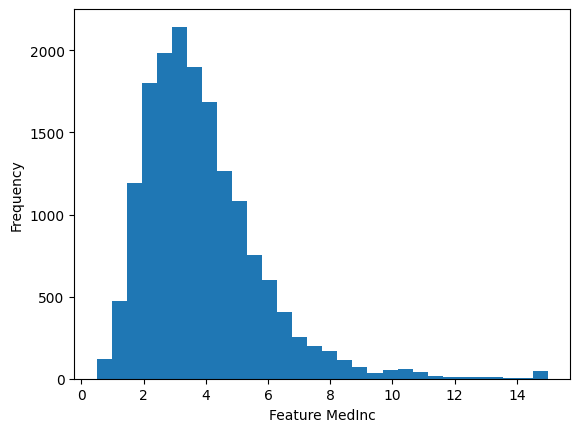

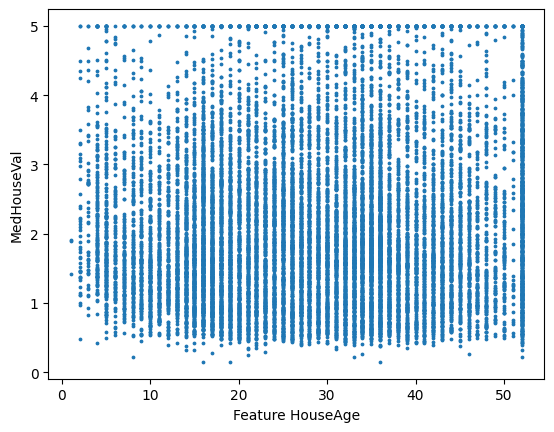

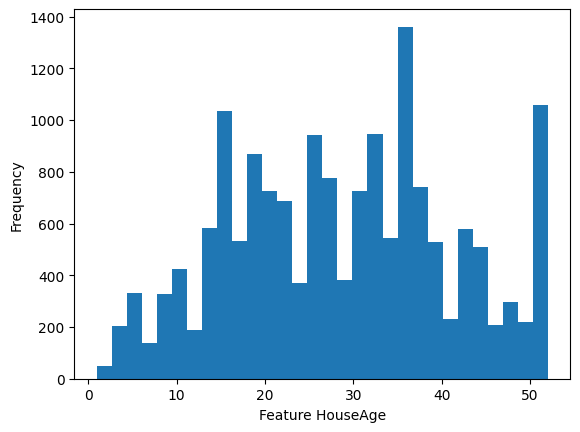

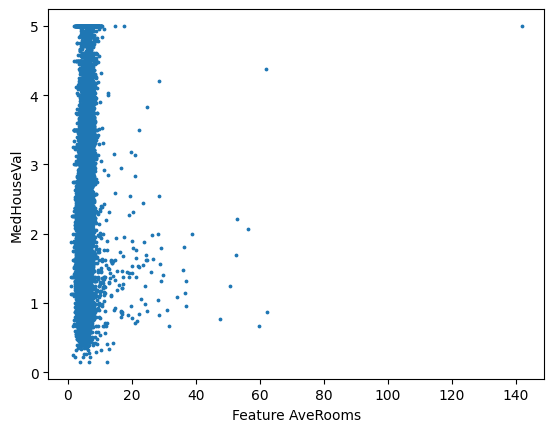

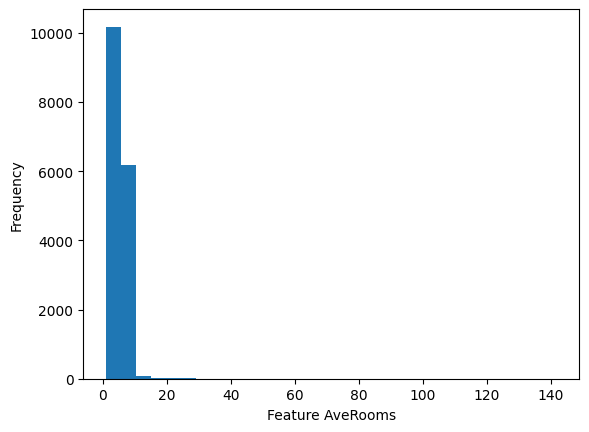

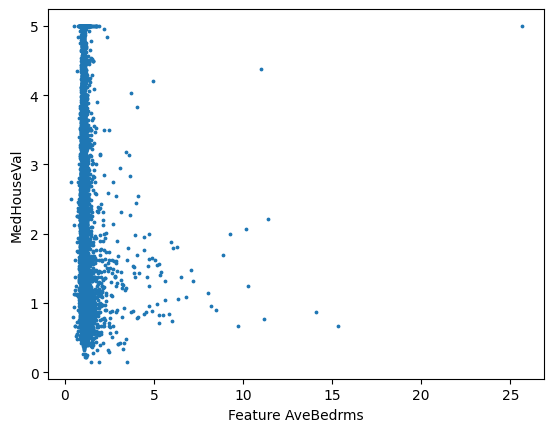

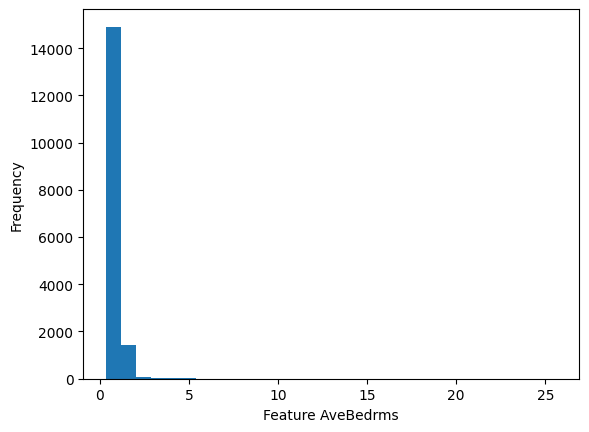

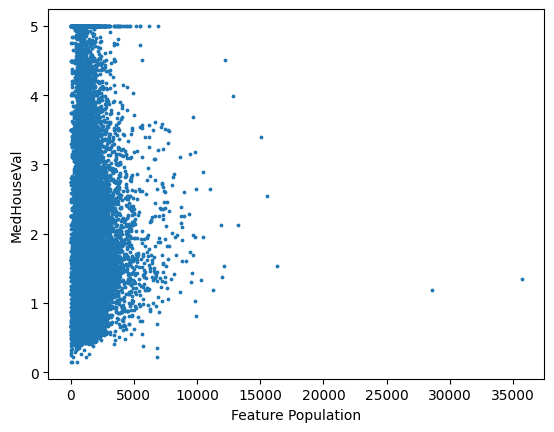

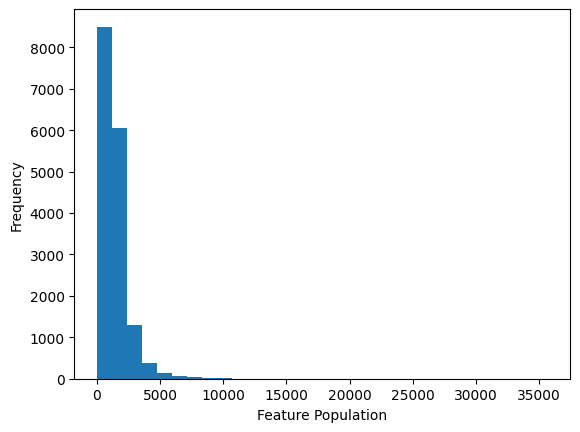

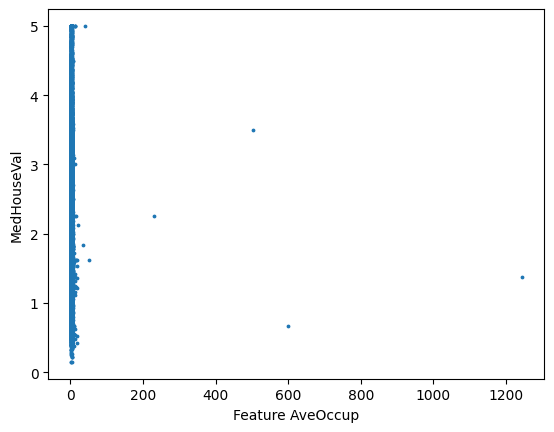

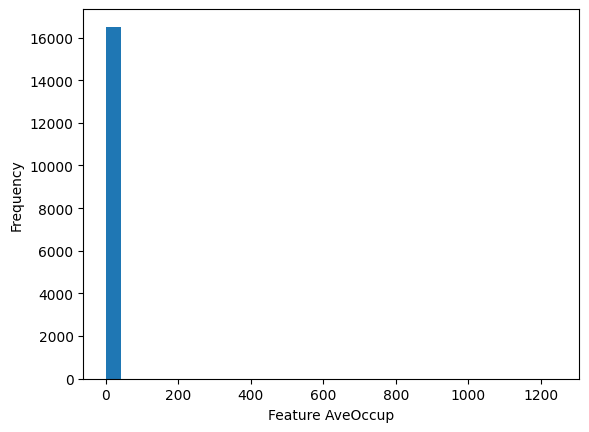

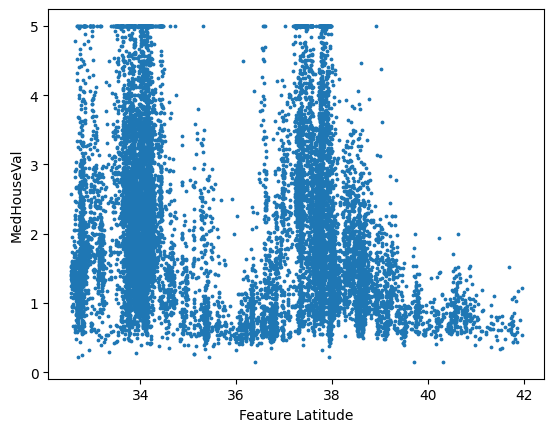

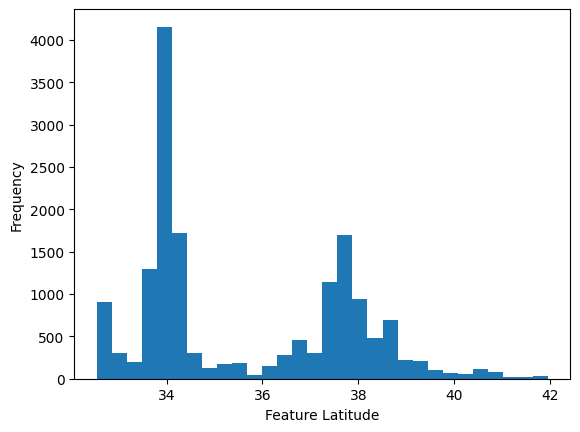

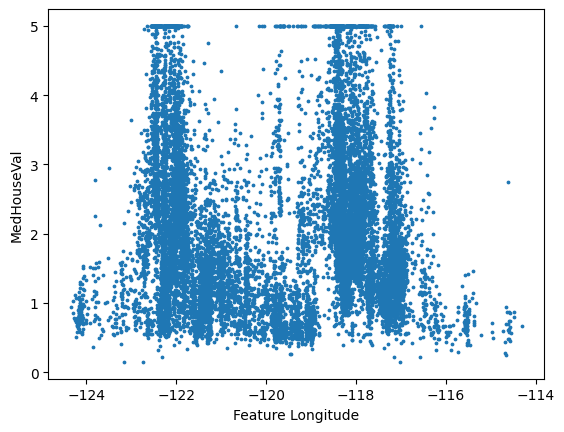

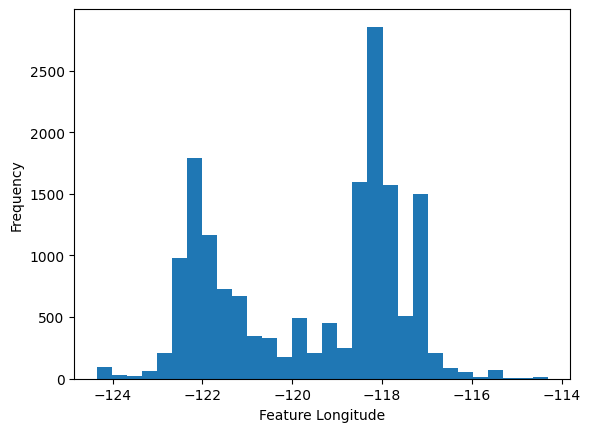

In [15]:

for idx, feature in enumerate(feature_names):
    plt.scatter(X_train[:, idx], y_train, s=3)
    plt.xlabel(f"Feature {feature}")
    plt.ylabel(target_name)
    plt.show()


    plt.hist(X_train[:, idx], bins=30)
    plt.xlabel(f"Feature {feature}")
    plt.ylabel("Frequency")
    plt.show()




Training a linear model. Graphing actual vs predicted values of the target variable using a scatter plot is a common practice in data visualization. This type of plot is also called an actual vs fitted graph or a predicted vs observed graph. [0] The main reason for creating such a plot is to assess the quality of a predictive model. Ideally, the points on the scatter plot should be close to a diagonal regression line. 

[0] - https://stats.stackexchange.com/questions/104622/what-does-an-actual-vs-fitted-graph-tell-us

Y = [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]X + -37.02327770606388


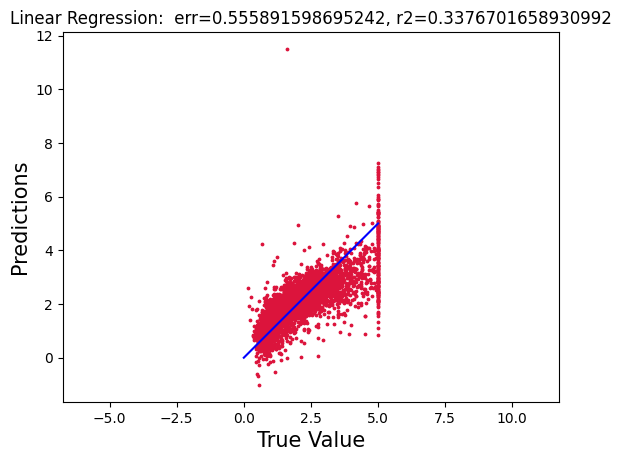

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

multiple_regression = LinearRegression()
multiple_regression.fit(X_train, y_train)

y_pred = multiple_regression.predict(X_test)
err = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

line = f'Linear Regression:  {err=}, {r2=}'
print(f'Y = {multiple_regression.coef_}X + {multiple_regression.intercept_}')


def actual_vs_predicted(y_test, y_pred, line: str):
    plt.xlabel(f"True Value", fontsize=15)
    plt.scatter(y_test, y_pred, color='crimson', s=3)
    plt.plot([0, max(y_test)], [0, max(y_test)], 'b-')
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.title(line)
    plt.show()

actual_vs_predicted(y_test, y_pred, line=line)


Training a linear model on polynomial data samples

Y = [-1.19367676e+01 -8.42630151e-01  7.88415380e+00 -3.83231200e+01
 -2.27731161e-04  1.01743127e+00  8.28463988e+00  5.70979224e+00
 -3.09492551e-02  1.57708010e-03  3.95472132e-02 -1.45652808e-01
  5.14650367e-05 -4.48293710e-03 -1.63991940e-01 -1.53482711e-01
  2.09625949e-04 -5.40026113e-04  9.58827644e-03  2.51416633e-06
 -1.90982873e-03 -1.02793717e-02 -1.00025865e-02  1.05983833e-02
 -1.05963888e-01 -5.70066786e-05  2.09081102e-02  1.06559793e-01
  1.00057435e-01  2.64008851e-01  4.91513568e-04 -8.00859244e-02
 -5.28062568e-01 -4.86723992e-01  1.50970588e-09  2.45816957e-05
  1.35016821e-05  6.68289252e-06  5.73953563e-05  2.04850532e-02
  1.58102369e-02  5.76573974e-02  1.01543054e-01  3.80409894e-02]X + 203.7814560157282


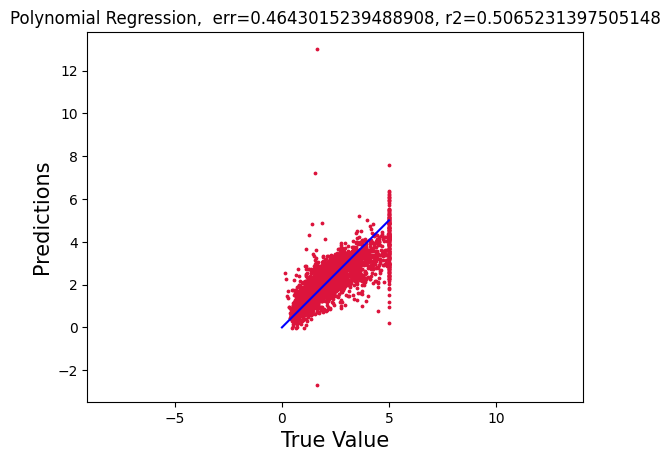

In [17]:

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train = dataset['X']['train']
y_train = dataset['Y']['train']
X_poly = poly.fit_transform(X_train)


mp_regression = LinearRegression()
mp_regression.fit(X_poly, y_train)

X_poly_test = poly.fit_transform(X_test)
y_pred = mp_regression.predict(X_poly_test)
err = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)
line = f'Polynomial Regression,  {err=}, {r2=}'
print(f'Y = {mp_regression.coef_}X + {mp_regression.intercept_}')
actual_vs_predicted(y_test, y_pred, line=line)

